In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("C:\\Users\\Basudev\\Downloads\\Datasets\\datascienceforbusiness-master")

In [2]:
hr_df = pd.read_csv('hr_data.csv')

In [3]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [5]:
#View which columns are categorical
hr_df.select_dtypes(exclude = ['int64', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [7]:
#Display Values inCategorical Columns
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [8]:
hr_df.shape

(14999, 9)

In [9]:
emp_satis_eval = pd.read_excel('employee_satisfaction_evaluation.xlsx')

In [10]:
emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [11]:
#Merge
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


MISSING VALUES

In [12]:
main_df.isnull()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False,False


In [13]:
main_df[main_df.isnull().any(axis = 1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [14]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
main_df.fillna(main_df.mean(), inplace = True)

In [16]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [17]:
main_df.loc[main_df['employee_id'] == 3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [18]:
main_df_final = main_df.drop(columns = 'employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [19]:
main_df_final.groupby('department').sum()
main_df_final.groupby('department').mean()
main_df_final['department'].value_counts()
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

CORRELATION MATRIX

No handles with labels found to put in legend.


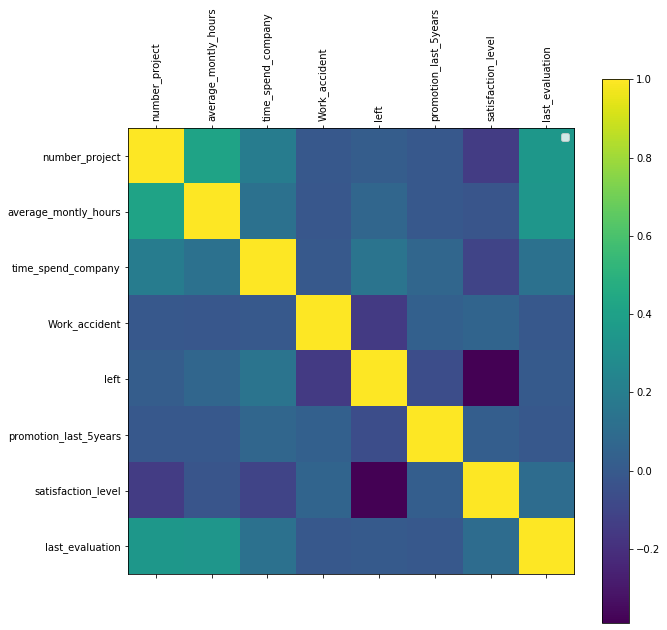

In [20]:
def plot_corr(df, size = 10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(main_df_final)

ONE HOT ENCODING

In [21]:
categorical = ['department', 'salary']
main_df_final = pd.get_dummies(main_df_final, columns = categorical, drop_first = True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [22]:
len(main_df_final.columns)

19

In [23]:
len(main_df_final.loc[main_df_final['left'] == 1])

3571

In [24]:
from sklearn.model_selection import train_test_split
X = main_df_final.drop(['left'], axis = 1).values
Y = main_df_final['left'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
df_train = pd.DataFrame(X_train)

In [27]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.644714,-0.029633,-1.021117,-0.411003,-0.142863,-0.537136,-0.383275,-0.235796,-0.231031,-0.228216,-0.206996,-0.247388,-0.252843,-0.618235,-0.417355,2.124676,1.018082,-0.864784
1,0.168909,-0.089721,-0.336397,-0.411003,-0.142863,-1.666847,0.378740,-0.235796,-0.231031,-0.228216,4.831019,-0.247388,-0.252843,-0.618235,-0.417355,-0.470660,1.018082,-0.864784
2,-1.458337,-1.351580,-0.336397,-0.411003,-0.142863,-0.698523,-1.028056,-0.235796,-0.231031,-0.228216,-0.206996,-0.247388,-0.252843,-0.618235,-0.417355,2.124676,1.018082,-0.864784
3,0.168909,0.791577,1.033044,-0.411003,-0.142863,0.713616,0.730439,-0.235796,-0.231031,-0.228216,-0.206996,-0.247388,-0.252843,1.617509,-0.417355,-0.470660,-0.982240,1.156358
4,-0.644714,1.412491,0.348323,-0.411003,-0.142863,0.673269,-0.910823,-0.235796,-0.231031,-0.228216,-0.206996,4.042227,-0.252843,-0.618235,-0.417355,-0.470660,-0.982240,1.156358


In [28]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04
mean,-2.514263e-16,9.844798e-17,1.332471e-16,-1.280999e-15,3.935513e-16,3.086296e-14,3.352002e-14,-6.391670e-16,8.573440e-16,-2.552019e-15,-6.361183e-18,6.352254e-16,8.033873e-16,-5.008263e-16,1.060009e-15,-6.688078e-16,-9.767076e-17,-1.713124e-16
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-1.458337e+00,-2.092671e+00,-1.021117e+00,-4.110031e-01,-1.428632e-01,-2.110662e+00,-2.083153e+00,-2.357956e-01,-2.310313e-01,-2.282157e-01,-2.069957e-01,-2.473884e-01,-2.528434e-01,-6.182346e-01,-4.173552e-01,-4.706601e-01,-9.822395e-01,-8.647840e-01
25%,-6.447142e-01,-8.909014e-01,-3.363969e-01,-4.110031e-01,-1.428632e-01,-6.985231e-01,-9.108232e-01,-2.357956e-01,-2.310313e-01,-2.282157e-01,-2.069957e-01,-2.473884e-01,-2.528434e-01,-6.182346e-01,-4.173552e-01,-4.706601e-01,-9.822395e-01,-8.647840e-01
50%,1.689086e-01,-2.963278e-02,-3.363969e-01,-4.110031e-01,-1.428632e-01,1.084135e-01,2.704089e-02,-2.357956e-01,-2.310313e-01,-2.282157e-01,-2.069957e-01,-2.473884e-01,-2.528434e-01,-6.182346e-01,-4.173552e-01,-4.706601e-01,-9.822395e-01,-8.647840e-01
75%,9.825315e-01,8.917243e-01,3.483235e-01,-4.110031e-01,-1.428632e-01,8.346564e-01,9.062884e-01,-2.357956e-01,-2.310313e-01,-2.282157e-01,-2.069957e-01,-2.473884e-01,-2.528434e-01,1.617509e+00,-4.173552e-01,-4.706601e-01,1.018082e+00,1.156358e+00
max,2.609777e+00,2.193642e+00,4.456646e+00,2.433072e+00,6.999702e+00,1.560899e+00,1.668303e+00,4.240962e+00,4.328417e+00,4.381819e+00,4.831019e+00,4.042227e+00,3.955018e+00,1.617509e+00,2.396041e+00,2.124676e+00,1.018082e+00,1.156358e+00


In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(predictions, y_test)*100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

79.53333333333333
[[2133  164]
 [ 450  253]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      2297
           1       0.61      0.36      0.45       703

    accuracy                           0.80      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.77      0.80      0.78      3000



In [30]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print(accuracy_score(predictions, y_test)*100)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

97.0
[[2291    6]
 [  84  619]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2297
           1       0.99      0.88      0.93       703

    accuracy                           0.97      3000
   macro avg       0.98      0.94      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [31]:
#Deep Learning
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 18))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Using TensorFlow backend.
C:\Users\Basudev\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Basudev\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Basudev\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Basudev\anaconda3\lib\site-packages\tensorflow\python\framework\d

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Training the Classifier
history = model.fit(X_train,
                   y_train,
                   batch_size = 10,
                   epochs = 25,
                   verbose = 1,
                   validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

Instructions for updating:
Use tf.cast instead.
Train on 11999 samples, validate on 3000 samples
Epoch 1/25
11999/11999 [==============================] - 2s 132us/step - loss: 0.4164 - accuracy: 0.7970 - val_loss: 0.3032 - val_accuracy: 0.8430
Epoch 2/25
11999/11999 [==============================] - 1s 96us/step - loss: 0.2697 - accuracy: 0.8585 - val_loss: 0.2321 - val_accuracy: 0.9107
Epoch 3/25
11999/11999 [==============================] - 1s 98us/step - loss: 0.2236 - accuracy: 0.9373 - val_loss: 0.2029 - val_accuracy: 0.9450
Epoch 4/25
11999/11999 [==============================] - 1s 104us/step - loss: 0.2016 - accuracy: 0.9486 - val_loss: 0.1847 - val_accuracy: 0.9553
Epoch 5/25
11999/11999 [==============================] - 1s 105us/step - loss: 0.1888 - accuracy: 0.9515 - val_loss: 0.1740 - val_accuracy: 0.9570
Epoch 6/25
11999/11999 [==============================] - 1s 106us/step - loss: 0.1810 - accuracy: 0.9546 - val_loss: 0.1675 - val_accuracy: 0.9577
Epoch 7/25
11999/

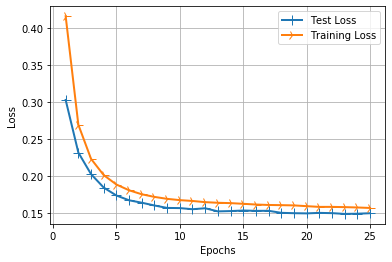

In [33]:
#Plotting Loss Chart
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

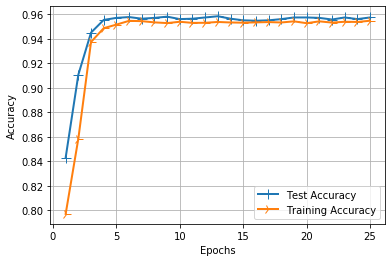

In [34]:
#Plotting Accuray Chart
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [35]:
#Classification Report and Confusion Matrix
predictions = model.predict(X_test)
predictions = (predictions > 0.5)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2223   74]
 [  54  649]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2297
           1       0.90      0.92      0.91       703

    accuracy                           0.96      3000
   macro avg       0.94      0.95      0.94      3000
weighted avg       0.96      0.96      0.96      3000



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1900      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 12,101
Trainable params: 12,101
Non-trainable params: 0
_________________________________________________________________
Train on 11999 samples, validate on 3000 samples
Epoch 1/25
11999/11999 [==============================] - 1s 67us/step - loss: 0.3268 - accuracy: 0.8604 - val_loss: 0.1659 - val_accuracy: 0.9477
Epoch 2/25
11999/11999 [==============================] - 1s 43us/step - loss: 0.1551 - accuracy: 0.9543 - val_loss: 0.1299 - val_accuracy: 0.9637
Epoch 3/25
11999/11999 [=============

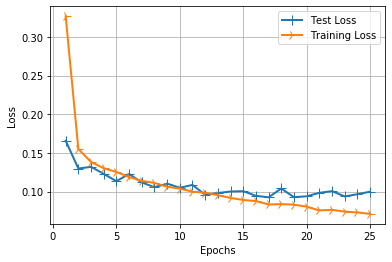

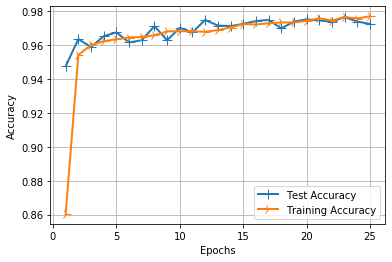

[[2263   34]
 [  48  655]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2297
           1       0.95      0.93      0.94       703

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [36]:
#Deeper Learning
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu', input_dim = 18))

model.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
                
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

#Training the Classifier
history = model.fit(X_train,
                   y_train,
                   batch_size = 32,
                   epochs = 25,
                   verbose = 1,
                   validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

#Plotting Loss Chart
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

#Plotting Accuray Chart
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

#Classification Report and Confusion Matrix
predictions = model.predict(X_test)
predictions = (predictions > 0.5)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))